# Exploratory Data Analysis

## Import packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("Display.max_columns", None)
import warnings 

In [74]:
df = pd.read_excel('data/default-of-credit-card-clients.xls', header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Drop ID Column

The `ID` column seems to be unqiue for all and sequential for the dataset. We drop the column first.

In [4]:
df.drop('ID', inplace=True, axis=1)

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Rename DataFrame Columns

The columns do not provide much information or insight on what they contain. We shall rename them now.

In [6]:
# Create a column name map for better usage

column_name_map = {
    'LIMIT_BAL': 'Credit_Amount_Available',
    'SEX': 'Gender',
    'EDUCATION': 'Education_Level',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Repayment_Status_Sep_2005',
    'PAY_2': 'Repayment_Status_Aug_2005',
    'PAY_3': 'Repayment_Status_Jul_2005',
    'PAY_4': 'Repayment_Status_Jun_2005',
    'PAY_5': 'Repayment_Status_May_2005',
    'PAY_6': 'Repayment_Status_Apr_2005',
    'BILL_AMT1': 'Bill_Amount_Sep_2005',
    'BILL_AMT2': 'Bill_Amount_Aug_2005',
    'BILL_AMT3': 'Bill_Amount_Jul_2005',
    'BILL_AMT4': 'Bill_Amount_Jun_2005',
    'BILL_AMT5': 'Bill_Amount_May_2005',
    'BILL_AMT6': 'Bill_Amount_Apr_2005',
    'PAY_AMT1': 'Amount_Paid_Sep_2005',
    'PAY_AMT2': 'Amount_Paid_Aug_2005',
    'PAY_AMT3': 'Amount_Paid_Jul_2005',
    'PAY_AMT4': 'Amount_Paid_Jun_2005',
    'PAY_AMT5': 'Amount_Paid_May_2005',
    'PAY_AMT6': 'Amount_Paid_Apr_2005',
    'default payment next month': 'Default_Status'
}

In [7]:
# Rename the dataframe columns for better understanding and usage
df.rename(columns=column_name_map, inplace=True)

In [75]:
data_corr = df.copy()

In [8]:
df.head(2)

,Credit_Amount_Available,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep_2005,Repayment_Status_Aug_2005,Repayment_Status_Jul_2005,Repayment_Status_Jun_2005,Repayment_Status_May_2005,Repayment_Status_Apr_2005,Bill_Amount_Sep_2005,Bill_Amount_Aug_2005,Bill_Amount_Jul_2005,Bill_Amount_Jun_2005,Bill_Amount_May_2005,Bill_Amount_Apr_2005,Amount_Paid_Sep_2005,Amount_Paid_Aug_2005,Amount_Paid_Jul_2005,Amount_Paid_Jun_2005,Amount_Paid_May_2005,Amount_Paid_Apr_2005,Default_Status
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


## Missing Values

Let's first check for missing values in the dataset which might need imputing.

In [9]:
df.isnull().sum()

Credit_Amount_Available      0
Gender                       0
Education_Level              0
Marital_Status               0
Age                          0
Repayment_Status_Sep_2005    0
Repayment_Status_Aug_2005    0
Repayment_Status_Jul_2005    0
Repayment_Status_Jun_2005    0
Repayment_Status_May_2005    0
Repayment_Status_Apr_2005    0
Bill_Amount_Sep_2005         0
Bill_Amount_Aug_2005         0
Bill_Amount_Jul_2005         0
Bill_Amount_Jun_2005         0
Bill_Amount_May_2005         0
Bill_Amount_Apr_2005         0
Amount_Paid_Sep_2005         0
Amount_Paid_Aug_2005         0
Amount_Paid_Jul_2005         0
Amount_Paid_Jun_2005         0
Amount_Paid_May_2005         0
Amount_Paid_Apr_2005         0
Default_Status               0
dtype: int64

#### Observation:

No missing values present in the dataset.

## Datatype of Columns

Let's check the dtype of each column in the dataset. From `df.head()` some columns look to be categorical in nature but hold numeric data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Credit_Amount_Available    30000 non-null  int64
 1   Gender                     30000 non-null  int64
 2   Education_Level            30000 non-null  int64
 3   Marital_Status             30000 non-null  int64
 4   Age                        30000 non-null  int64
 5   Repayment_Status_Sep_2005  30000 non-null  int64
 6   Repayment_Status_Aug_2005  30000 non-null  int64
 7   Repayment_Status_Jul_2005  30000 non-null  int64
 8   Repayment_Status_Jun_2005  30000 non-null  int64
 9   Repayment_Status_May_2005  30000 non-null  int64
 10  Repayment_Status_Apr_2005  30000 non-null  int64
 11  Bill_Amount_Sep_2005       30000 non-null  int64
 12  Bill_Amount_Aug_2005       30000 non-null  int64
 13  Bill_Amount_Jul_2005       30000 non-null  int64
 14  Bill_Amount_Jun_2005  

#### Observation:

As we can see, all the independent variables are of `int64` type although some are categorical. Let's correct this first on a copy of the dataset, so it will be easier for exploring the data later.

## Adjusting dtypes of columns

Key to the different categories: [Key](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)

Lets first check the unique values in the categorical columns.

In [16]:
df.Gender.unique()

array([2, 1], dtype=int64)

In [17]:
df.Marital_Status.unique()

array([1, 2, 3, 0], dtype=int64)

In [18]:
df.Education_Level.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [19]:
df.Repayment_Status_Sep_2005.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [20]:
df.Repayment_Status_Aug_2005.unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [21]:
df.Repayment_Status_Jul_2005.unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

In [22]:
df.Repayment_Status_Jun_2005.unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

In [23]:
df.Repayment_Status_May_2005.unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [24]:
df.Repayment_Status_Apr_2005.unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5], dtype=int64)

As we see from the unique values, there are datapoints in the categorical columns which do not any description in the dataset description provided in the `Key` above. We will replace those values with `unknown`.

In [25]:
# Create a map for replacing values

mapper = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Education_Level': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others',
                       0: 'Unknown', 5: 'Unknown', 6: 'Unknown'},
    'Marital_Status': {0: 'Unknown', 1: 'Married', 2: 'Single', 3: 'Others'},
    'Repayment_Status_Sep_2005': {-1: 'Pay Duly',
        1: '1 month delay',
        2: '2 months delay',
        3: '3 months delay',
        4: '4 months delay',
        5: '5 months delay',
        6: '6 months delay',
        7: '7 months delay',
        8: '8 months delay',
        9: '9 months delay',
        -2: 'Unknown',
        0: 'Unknown'},
    'Repayment_Status_Aug_2005': {-1: 'Pay Duly',
        1: '1 month delay',
        2: '2 months delay',
        3: '3 months delay',
        4: '4 months delay',
        5: '5 months delay',
        6: '6 months delay',
        7: '7 months delay',
        8: '8 months delay',
        9: '9 months delay',
        -2: 'Unknown',
        0: 'Unknown'},
    'Repayment_Status_Jul_2005': {-1: 'Pay Duly',
        1: '1 month delay',
        2: '2 months delay',
        3: '3 months delay',
        4: '4 months delay',
        5: '5 months delay',
        6: '6 months delay',
        7: '7 months delay',
        8: '8 months delay',
        9: '9 months delay',
        -2: 'Unknown',
        0: 'Unknown'},
    'Repayment_Status_Jun_2005': {-1: 'Pay Duly',
        1: '1 month delay',
        2: '2 months delay',
        3: '3 months delay',
        4: '4 months delay',
        5: '5 months delay',
        6: '6 months delay',
        7: '7 months delay',
        8: '8 months delay',
        9: '9 months delay',
        -2: 'Unknown',
        0: 'Unknown'},
    'Repayment_Status_May_2005': {-1: 'Pay Duly',
        1: '1 month delay',
        2: '2 months delay',
        3: '3 months delay',
        4: '4 months delay',
        5: '5 months delay',
        6: '6 months delay',
        7: '7 months delay',
        8: '8 months delay',
        9: '9 months delay',
        -2: 'Unknown',
        0: 'Unknown'},
    'Repayment_Status_Apr_2005': {-1: 'Pay Duly',
        1: '1 month delay',
        2: '2 months delay',
        3: '3 months delay',
        4: '4 months delay',
        5: '5 months delay',
        6: '6 months delay',
        7: '7 months delay',
        8: '8 months delay',
        9: '9 months delay',
        -2: 'Unknown',
        0: 'Unknown'}    
}

In [26]:
df_copy = df.copy()
df_copy.replace(mapper, inplace=True)

In [27]:
df_copy.head()

,Credit_Amount_Available,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep_2005,Repayment_Status_Aug_2005,Repayment_Status_Jul_2005,Repayment_Status_Jun_2005,Repayment_Status_May_2005,Repayment_Status_Apr_2005,Bill_Amount_Sep_2005,Bill_Amount_Aug_2005,Bill_Amount_Jul_2005,Bill_Amount_Jun_2005,Bill_Amount_May_2005,Bill_Amount_Apr_2005,Amount_Paid_Sep_2005,Amount_Paid_Aug_2005,Amount_Paid_Jul_2005,Amount_Paid_Jun_2005,Amount_Paid_May_2005,Amount_Paid_Apr_2005,Default_Status
0,20000,Female,University,Married,24,2 months delay,2 months delay,Pay Duly,Pay Duly,Unknown,Unknown,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,Pay Duly,2 months delay,Unknown,Unknown,Unknown,2 months delay,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57,Pay Duly,Unknown,Pay Duly,Unknown,Unknown,Unknown,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


We can have a decent idea of the dataset from the datapoints apart from the `Unknown` points.

## Descriptive Statistics

Lets check the descriptive statistics of the dataset.

In [28]:
df_copy.shape

(30000, 24)

As expected we have 30000 datapoints.

In [30]:
df_copy.describe(include = 'all')

,Credit_Amount_Available,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep_2005,Repayment_Status_Aug_2005,Repayment_Status_Jul_2005,Repayment_Status_Jun_2005,Repayment_Status_May_2005,Repayment_Status_Apr_2005,Bill_Amount_Sep_2005,Bill_Amount_Aug_2005,Bill_Amount_Jul_2005,Bill_Amount_Jun_2005,Bill_Amount_May_2005,Bill_Amount_Apr_2005,Amount_Paid_Sep_2005,Amount_Paid_Aug_2005,Amount_Paid_Jul_2005,Amount_Paid_Jun_2005,Amount_Paid_May_2005,Amount_Paid_Apr_2005,Default_Status
count,30000.000000,30000,30000,30000,30000.000000,30000,30000,30000,30000,30000,30000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,5,4,NaN,10,10,10,10,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Female,University,Single,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18112,14030,15964,NaN,17496,19512,19849,20803,21493,21181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,167484.322667,NaN,NaN,NaN,35.485500,NaN,NaN,NaN,NaN,NaN,NaN,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,NaN,NaN,NaN,9.217904,NaN,NaN,NaN,NaN,NaN,NaN,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


#### Observation:

From the first look it seems the dataset has outliers, which can be expected given spending potential and earning of prospective customers can be highly skewed.

Highest frequency of Education Level: University
Highest frequency of Gender: Female
Highest frequency of marital_Status: Single

Unfortunately, for repayment status columns, Unknown has the most frequency. We would need to find the second highest occuring data point.

The median Credit Amount is 140000 whereas the max is 1m, which is quite high.

## Data Imbalance

Lets check the dataset for data imbalance.

0    77.88
1    22.12
Name: Default_Status, dtype: float64


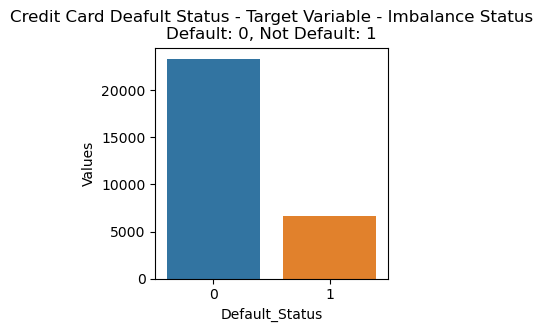

In [38]:
print(df_copy['Default_Status'].value_counts()/df_copy.shape[0] * 100)

temp = df_copy['Default_Status'].value_counts()
temp_df = pd.DataFrame({'Default_Status': temp.index, 'Values': temp.values})
plt.figure(figsize = (3,3))
plt.title("Credit Card Deafult Status - Target Variable - Imbalance Status\nDefault: 0, Not Default: 1")
sns.barplot(x = 'Default_Status', y = 'Values', data=temp_df)
plt.show()

#### Observation: 

There is some imbalance in the target variable. It looks like there is about 78-22 split in the dataset. This will impact the classification model. So we will try to undersample the majority dataset.

## Exploration

### Credit Limit Variation

<Figure size 2000x1000 with 0 Axes>

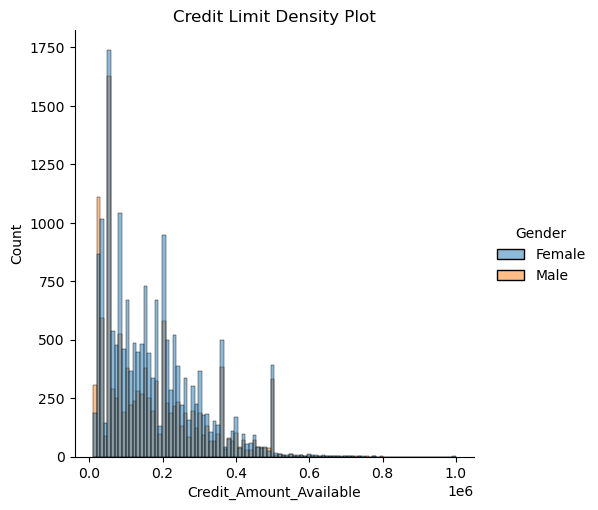

In [51]:
plt.figure(figsize = (20,10))
sns.set_color_codes('pastel')
sns.displot(x='Credit_Amount_Available', bins = 100, hue='Gender', data = df_copy)
plt.title("Credit Limit Density Plot")
plt.show()

#### Observations:

Females tend to have a higher Credit Amount than males and there are a few outliers as the tail ends up on the extreme right.

<Figure size 2000x1000 with 0 Axes>

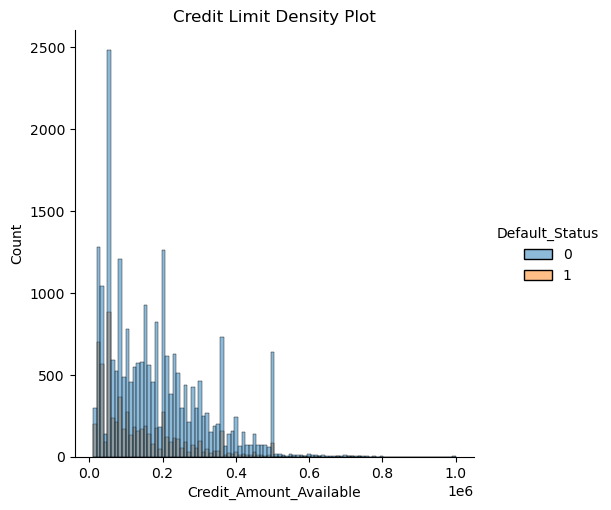

In [54]:
plt.figure(figsize = (20,10))
sns.set_color_codes('pastel')
sns.displot(x='Credit_Amount_Available', bins = 100, hue='Default_Status', data = df_copy)
plt.title("Credit Limit Density Plot")
plt.show()

#### Observations:

Customers who are projected to Default have higher Credit Amount Available.

### Credit_Amount_Available, Marital_Status, Age, Gender and Education_Level

In [65]:
def plot_box(feature1, feature2, feature3):
    fig, ax1 = plt.subplots(ncols=1, figsize=(14,6))
    sns.boxplot(ax=ax1,
                x=feature1,
                y=feature2,
                hue=feature3,
                palette = 'PRGn',
                data=df_copy)
#     sns.set_xticklabels(sns.get_xticklabels(), rotation=90)
    plt.show()

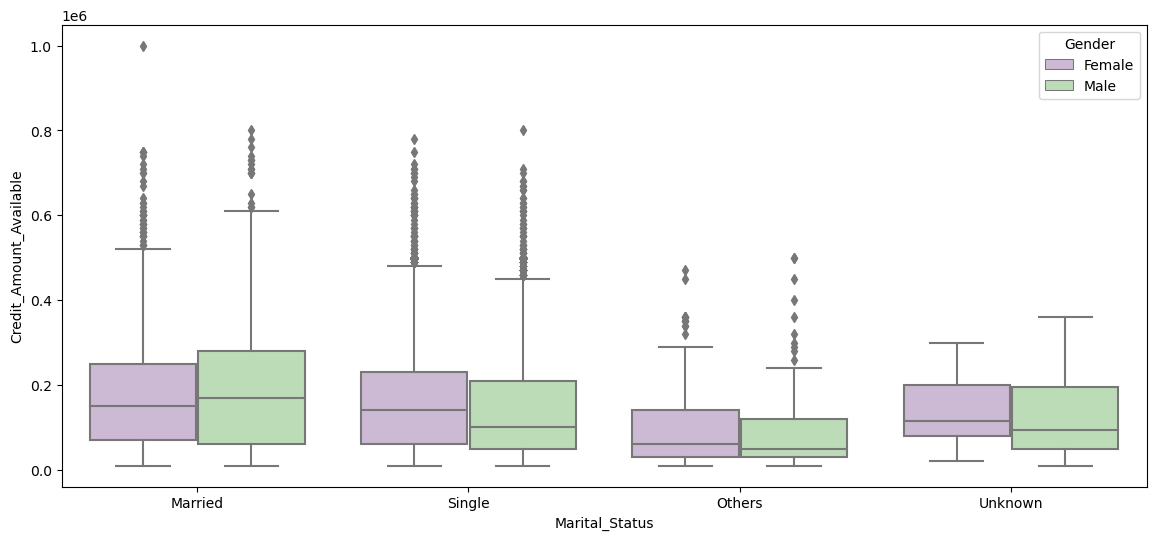

In [66]:
plot_box('Marital_Status', 'Credit_Amount_Available', 'Gender')

#### Observations:

Married people and Single people have higher Credit Limits among other groups. We will have to handle outliers.

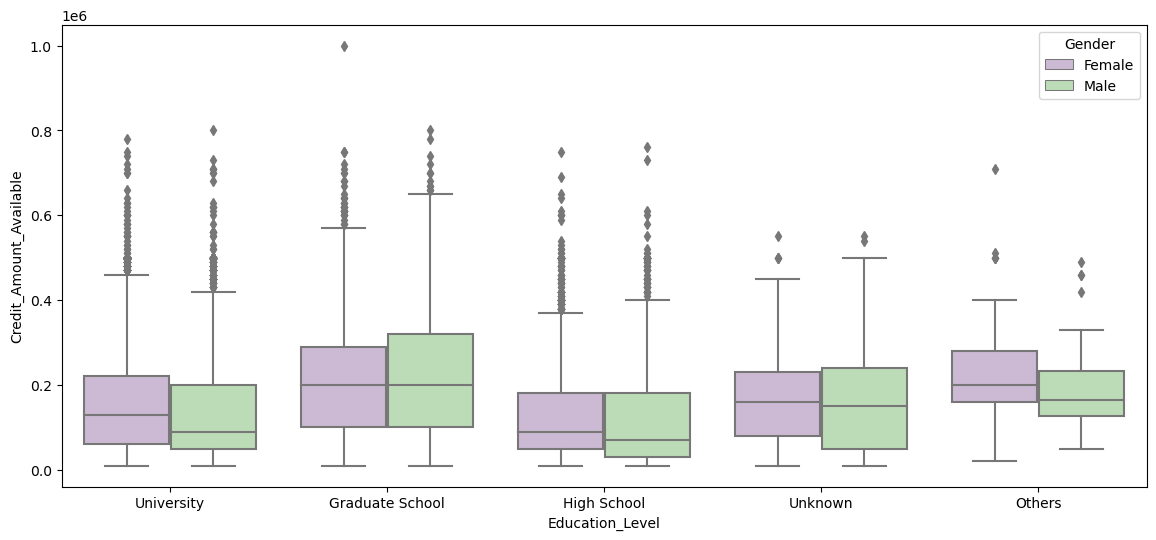

In [67]:
plot_box('Education_Level', 'Credit_Amount_Available', 'Gender')

#### Observations:

Graduates have the highest median Credit Amounts.

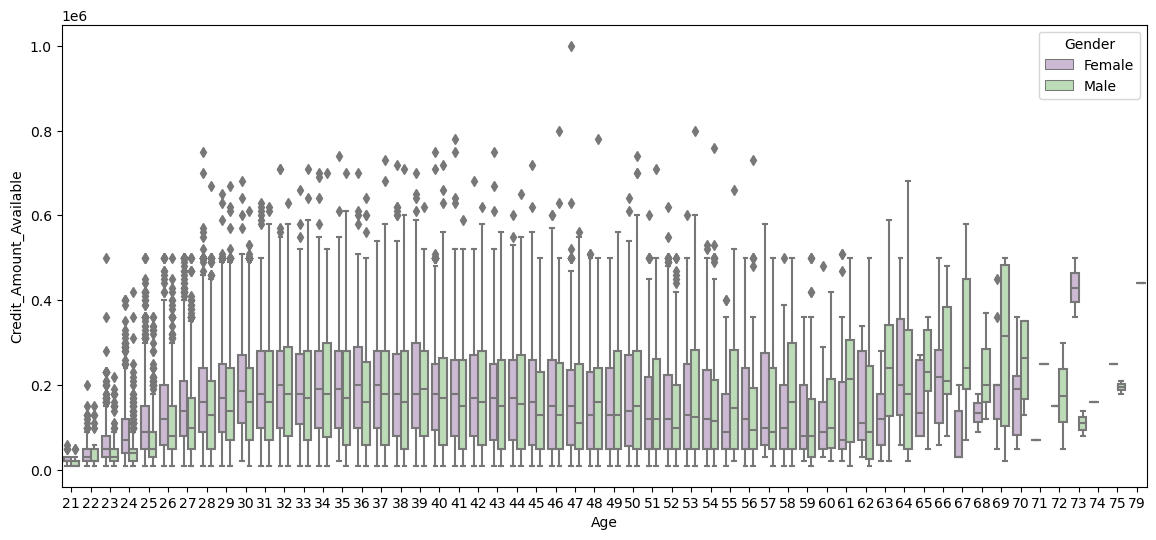

In [68]:
plot_box('Age', 'Credit_Amount_Available', 'Gender')

#### Observations:

The Credit Limit variation among different ages starts of low at a lower age, gradually increasing and plateauing between 30-50 years and then for higher ages above 60, the Limits start increasing.

## Correlations among various Billing and Payment Status

### Among Repayment Status

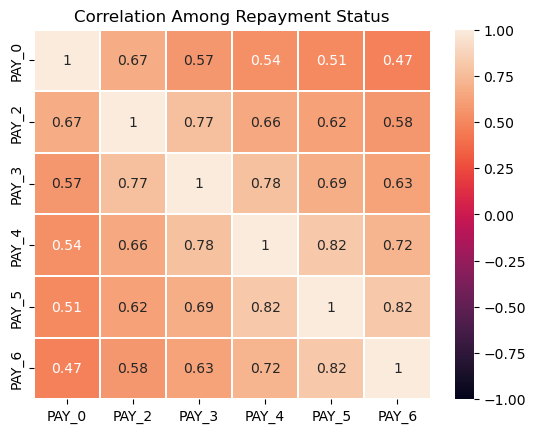

In [77]:
cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

corr = data_corr[cols].corr()
plt.title('Correlation Among Repayment Status')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, annot=True, vmin=-1, vmax=1)
plt.show()

#### Observations:

For each month, the month immediately preceeding has the highest correlation.

### Among Billed Amounts